# Applications of Principal Component Analysis (PCA)


In this lab I will explore how to implement two important applications of PCA.

1. The first application illustrates how to use PCA to project 2-D data onto its principal axes, meaning the two orthogonal directions that explain most of the variance in the data.

2. For the second application, I will use PCA to project higher dimensional data down to a lower dimensional feature space. This is an example of dimension reduction, a powerful technique that has multiple benefits, including reducing model-building computational load and, in many cases, the accuracy of the model. PCA can help filter out redundant, linearly correlated variables and reduce the amount of noise in the data.


In [1]:
!pip install numpy==2.2.0
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.2.0 which is incompatible.
contourpy 1.2.0 requ

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Part I: Using PCA to project 2-D data onto its principal axes


### Create dataset
Creating 2-dimensional dataset containing two linearly correlated features.

Both features, X1 and X2, will have zero mean and a covariance given by the (symmetric) covariance matrix:

\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

Here, the diagonal elements define the variances of X1 and X2 (3 and 2, respectively), while the off-diagonal element is the covariance (2) between X1 and X2, which expresses how similarly these features vary.


In [4]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

### Visualize the relationship between the two features.


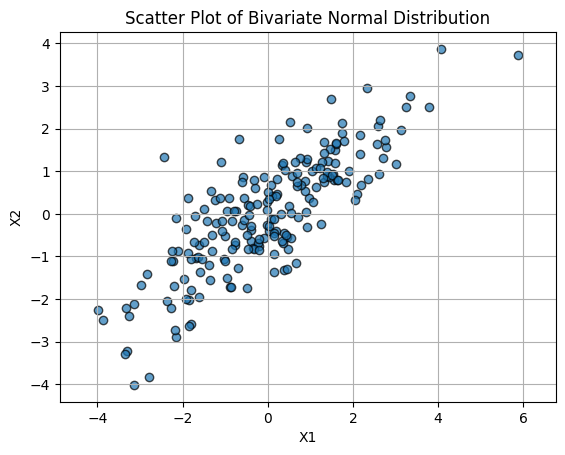

In [5]:
# Scatter plot of the two features
plt.figure()
plt.scatter(X[:, 0], X[:, 1],  edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

Consider the main direction the data follows in the scatterplot. It's actually the direction of the first principal component. I can use PCA to determine this direction.

###  Perform PCA on the dataset
Next, I'll initialize a 2-component PCA model with default parameters and then fit and transform the feature space in one step.

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### Get the principal components from the model. 
The principal components are the principal axes, represented in feature space coordinates, 
which align with the directions of maximum variance in the data. 


In [7]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

The principal components are sorted in decreasing order by their explained variance, which can be expressed as a ratio:


In [8]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

You can see that the first component explains over 90% of the variance in the data, while the second explains about 9%.

### Display the results
We'll use a scatterplot to display the data points in their original feature space, X1, X2.

We'll also plot the projections of the data points onto their principal component directions.


In [9]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [11]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

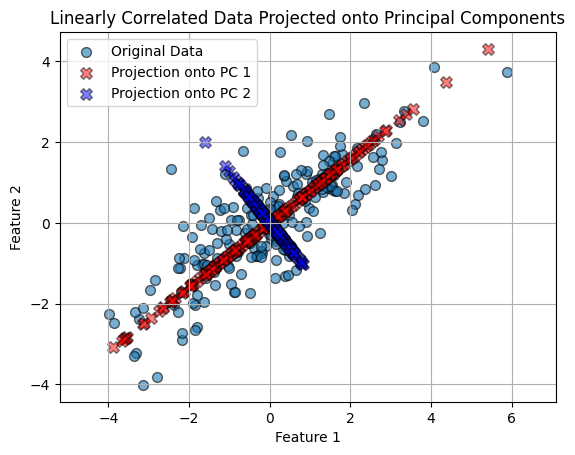

In [12]:
# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

1. The first direction, in red, is aligned in the direction having the widest variation.
2. The second direction, in blue, is perpendicular to first and has a lower variance.

# Part II. PCA for feature space dimensionality reduction
We'll use PCA to project the four-dimensional Iris feature data set down onto a two-dimensional feature space.
This will have the added benefit of enabling you to visualize some of the most important structures in the dataset.


### Load and preprocess Iris data


In [13]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Iris flower's names
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Initialize a PCA model and reduce the Iris data set dimensionality to two components¶

In [15]:
# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

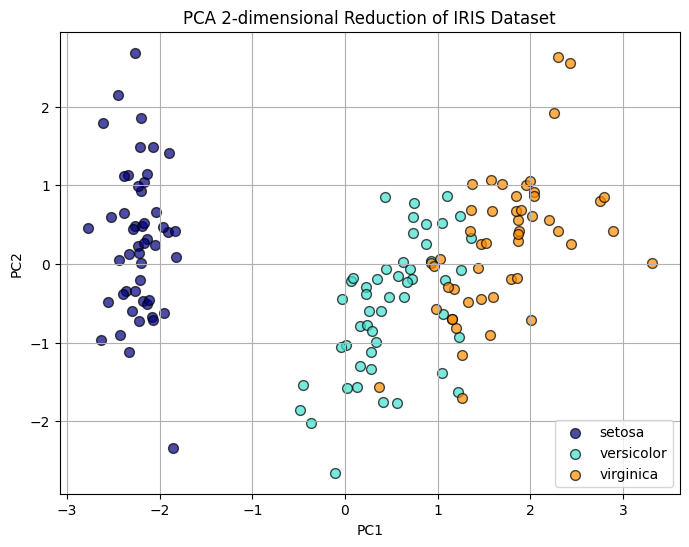

In [21]:
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_pca[y==i,0],X_pca[y==i, 1], color=color, s=50, ec='k', alpha=0.7,lw=lw,label=target_name)
plt.title('PCA 2-dimensional Reduction of IRIS Dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
plt.grid(True)
plt.show()

### Percentage of the original feature space variance these two combined principal components explain...

In [22]:
100*pca.explained_variance_ratio_.sum()


95.81320720000164

### Reinitialize the PCA model without reducing the dimension¶

Let's standardize the Iris data, and fit and transform the scaled data.

In [23]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

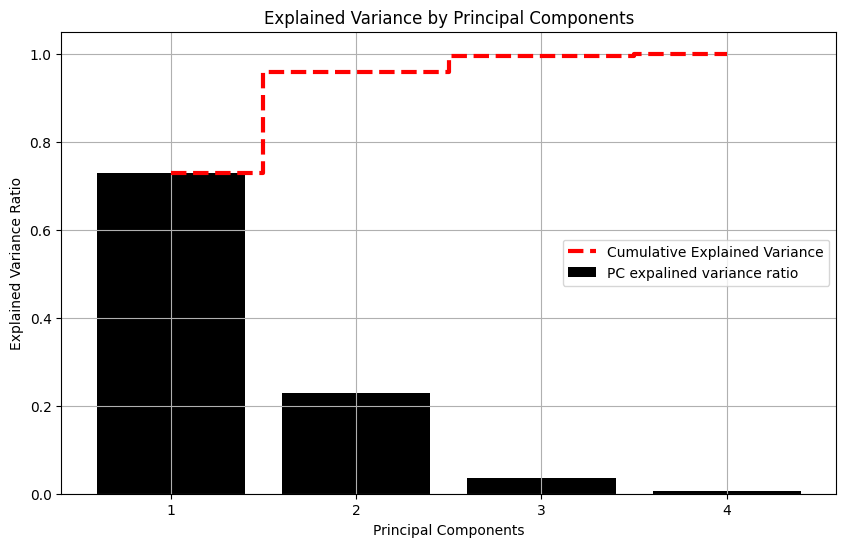

In [31]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), color='black', height=explained_variance_ratio, alpha=1, align='center',label='PC expalined variance ratio')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1,5), cumulative_variance, where='mid',linestyle='--', lw=3, color='red', label='Cumulative Explained Variance')
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

The red dashed line shows how much total variance in the dataset is captured when adding more principal components.

To suppress noise in the Iris data, it's crucial to keep only the components that explain a high percentage of the variance, and discard the rest. This method reduces dimensionality and filter out noise